In [ ]:
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import *
from RootInteractive.Tools.aliTreePlayer import *
from bokeh.io import curdoc
import os
import sys
import pytest
from pandas import CategoricalDtype

if "ROOT" in sys.modules:
    from ROOT import TFile, gSystem

output_file("test_bokehDrawSA.html")
# import logging

if "ROOT" in sys.modules:
    TFile.SetCacheFileDir("data/")
    tree, treeList, fileList = LoadTrees("echo data/treeABCD.root", ".*", ".*ABCDE.*", ".*", 0)
    tree.SetAlias("errY","A*0.02+0.02")
    AddMetadata(tree, "A.AxisTitle", "A (cm)")
    AddMetadata(tree, "B.AxisTitle", "B (cm/s)")
    AddMetadata(tree, "C.AxisTitle", "B (s)")
    AddMetadata(tree, "D.AxisTitle", "D (a.u.)")

df = pd.DataFrame(np.random.random_sample(size=(20000, 6)), columns=list('ABCDEF'))
initMetadata(df)
MARKERS = ['hex', 'circle_x', 'triangle','square']
markerFactor=factor_mark('DDC', MARKERS, ["A0","A1","A2","A3","A4"] )
colorFactor=factor_cmap('DDC', 'Category10_6', ["A0","A1","A2","A3","A4"] )

mapDDC={0:"A0",1:"A1",2:"A2",3:"A3",4:"A4"}
df.eval("Bool=A>0.5", inplace=True)
df.eval("BoolB=B>0.5", inplace=True)
df.eval("BoolC=C>0.1", inplace=True)
df["A"]=df["A"].round(3);
df["B"]=df["B"].round(3);
df["C"]=df["C"].round(3);
df["D"]=df["D"].round(3);
df["AA"]=((df.A*10).round(0)).astype(CategoricalDtype(ordered=True))
df["CC"]=((df.C*5).round(0)).astype(int)
df["DD"]=((df.D*4).round(0)).astype(int)
df["DDC"]=((df.D*4).round(0)).astype(int).map(mapDDC)
df["EE"]=(df.E*4).round(0)
df['errY']=df.A*0.02+0.02;
df.head(10)
df.meta.metaData = {'A.AxisTitle': "A (cm)", 'B.AxisTitle': "B (cm/s)", 'C.AxisTitle': "C (s)", 'D.AxisTitle': "D (a.u.)", 'Bool.AxisTitle': "A>half", 'E.AxisTitle': "Category"}



figureArray = [
#   ['A'], ['C-A'], {"color": "red", "size": 7, "colorZvar":"C", "filter": "A<0.5"}],
    [['A'], ['A*A-C*C'], {"color": "red", "size": 2, "colorZvar": "A", "varZ": "C", "errY": "errY", "errX":"0.01"}],
    [['A'], ['C+A', 'C-A', 'A/A']],
    [['B'], ['C+B', 'C-B'], { "size": 7, "colorZvar": "C", "errY": "errY", "rescaleColorMapper": True }],
    [['D'], ['(A+B+C)*D'], {"size": 10, "errY": "errY"} ],
#    [['D'], ['D*10'], {"size": 10, "errY": "errY","markers":markerFactor, "color":colorFactor,"legend_field":"DDC"}],
    #marker color works only once - should be constructed in wrapper
    [['D'], ['D*10'], {"size": 10, "errY": "errY"}],
]
#widgets="slider.A(0,1,0.05,0,1), slider.B(0,1,0.05,0,1), slider.C(0,1,0.01,0.1,1), slider.D(0,1,0.01,0,1), checkbox.Bool(1), multiselect.E(0,1,2,3,4)"
widgets="slider.A(0,1,0.05,0,1), slider.B(0,1,0.05,0,1), slider.C(0,1,0.01,0.1,1), slider.D(0,1,0.01,0,1), checkbox.Bool(1)"
tooltips = [("VarA", "(@A)"), ("VarB", "(@B)"), ("VarC", "(@C)"), ("VarD", "(@D)")]

widgetParams=[
    ['range', ['A']],
    ['range', ['B', 0, 1, 0.1, 0, 1]],
    ['range', ['C'], {'type': 'minmax'}],
    ['range', ['D'], {'type': 'sigma', 'bins': 10, 'sigma': 3}],
    ['range', ['E'], {'type': 'sigmaMed', 'bins': 10, 'sigma': 3}],
    ['slider', ['AA'], {'bins': 10}],
    ['multiSelect', ["DDC"]],
    ['select',["CC", 0, 1, 2, 3]],
    ['select',["Bool"]],
    ['multiSelect',["BoolB"]],
    #['slider','F', ['@min()','@max()','@med','@min()','@median()+3*#tlm()']], # to be implmneted
]
widgetLayoutDesc=[[0, 1, 2], [3, 4, 5], [6, 7],[8,9], {'sizing_mode': 'scale_width'}]

figureLayoutDesc=[
    [0, 1, 2, {'commonX': 1, 'y_visible': 1, 'x_visible':1, 'plot_height': 300}],
    [3, 4, {'plot_height': 100, 'x_visible': 1, 'y_visible': 2}],
    {'plot_height': 100, 'sizing_mode': 'scale_width', 'y_visible' : 2}
]


def testBokehDrawArrayWidget():
    output_file("test_BokehDrawArrayWidget.html")
    xxx=bokehDrawSA.fromArray(df, "A>0", figureArray, widgetParams, layout=figureLayoutDesc, tooltips=tooltips,widgetLayout=widgetLayoutDesc,sizing_mode="scale_width")

def testBokehDrawArrayWidgetNoScale():
    output_file("test_BokehDrawArrayWidgetNoScale.html")
    xxx=bokehDrawSA.fromArray(df, "A>0", figureArray, widgetParams, layout=figureLayoutDesc, tooltips=tooltips,widgetLayout=widgetLayoutDesc,sizing_mode=None)


def testBokehDrawArrayDownsample():
    output_file("test_BokehDrawArrayDownsample.html")
    xxx=bokehDrawSA.fromArray(df, "A>0", figureArray, widgetParams, layout=figureLayoutDesc, tooltips=tooltips, widgetLayout=widgetLayoutDesc, nPointRender=200)

def testBokehDrawArrayQuery():
    output_file("test_BokehDrawArrayQuery.html")
    df0 = df.copy()
    xxx=bokehDrawSA.fromArray(df0, "BoolC == True", figureArray, widgetParams, layout=figureLayoutDesc, tooltips=tooltips, widgetLayout=widgetLayoutDesc, nPointRender=200)
    assert (df0.keys() == df.keys()).all()

def testBokehDrawArraySA_tree():
    if "ROOT" not in sys.modules:
        pytest.skip("no ROOT module")
    output_file("test_bokehDrawSAArray_fromTTree.html")
    fig=bokehDrawSA.fromArray(tree, "A>0", figureArray, widgets, tooltips=tooltips, layout=figureLayoutDesc)


#testBokehDrawArraySA_tree()
#testBokehDrawArrayWidget()               # OK
#testBokehDrawArrayWidgetNoScale()
#testBokehDrawArrayDownsample()
#testBokehDrawArrayQuery()

In [2]:
testBokehDrawArrayDownsample()

In [3]:
tree

<ROOT.TTree object ("tree") at 0x8293950>

In [3]:
import pylab as plt
import numpy as np
import pandas as pd

In [4]:
def SpoofTrendingDF():
    #for each time, we  have valueA, valueB, errA, errC, entriesA, entriesB
    times = range(10)#spoofed
    meansA = [50+np.random.normal() for ele in range(10)]#spoofed means for the trending variable
    meansB = [50+np.random.normal() for ele in range(10)]#spoofed means for the trending variable
    stddevA = [4+np.random.normal()/2 for ele in range(10)]#spoofed stddev for the trending variable
    stddevB = [4+np.random.normal()/2 for ele in range(10)]#spoofed stddev for the trending variable
    arr = np.array([times, meansA, meansB, stddevA, stddevB]).transpose()
    df = pd.DataFrame(arr, columns = ["time", "meanVarA", "meanVarB", "stddevVarA", "stddevVarB"])
    initMetadata(df)
    df.meta.metaData = {'time.AxisTitle': "time (s)", 'meanVarA.AxisTitle': "VarA (cm/s)", 'meanVarB.AxisTitle': "meanVarB (s)", 'stddevVarA.AxisTitle': "stddevVarA (a.u.)", 'stddevVarB.AxisTitle': "stddevVarB"}


    return df

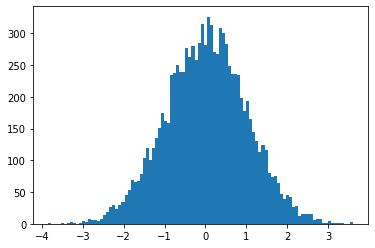

In [5]:
plt.hist([np.random.normal() for ele in range(10000)], bins=100)
plt.show()

In [6]:
df_test = SpoofTrendingDF()
df_test.head()

,time,meanVarA,meanVarB,stddevVarA,stddevVarB
0,0.0,49.950088,50.529925,4.341125,4.818537
1,1.0,48.878531,50.759059,4.125693,3.613088
2,2.0,50.655353,49.617797,3.859466,4.549383
3,3.0,51.544672,49.768989,3.771561,3.228478
4,4.0,49.712061,49.579833,4.371677,3.731419


In [7]:
figureArray = [
    [['time'], ['meanVarA', 'meanVarB']],
    [['time'], ['meanVarB']]
]

figureLayoutDesc = [[0, 1]]



#widgets="slider.A(0,1,0.05,0,1), slider.B(0,1,0.05,0,1), slider.C(0,1,0.01,0.1,1), slider.D(0,1,0.01,0,1), checkbox.Bool(1), multiselect.E(0,1,2,3,4)"
#widgets="slider.time(0,1,0.05,0,1), slider.meanVarA(0,1,0.05,0,1), slider.meanVarB(0,1,0.01,0.1,1), slider.stddevA(0,1,0.01,0,1)"
tooltips = [("meanVarA", "(@meanVarA)"), ("meanVarB", "(@meanVarB)"), ("stddevVarA", "(@stddevVarA)"), ("stddevVarB", "(@stddevVarB)")]

widgetParams=[
    ['range', ['time']],
    ['range', ['meanVarA']],
    ['range', ['meanVarB']]#,
    #{'plot_height':100,'sizing_mode':'scale_width'}
    #['slider','F', ['@min()','@max()','@med','@min()','@median()+3*#tlm()']], # to be implmneted
]
widgetLayoutDesc=[[0, 1, 2], {'sizing_mode': 'scale_width'}]




tree = df_test
def testBokehDrawArraySA_tree():
    if "ROOT" not in sys.modules:
        pytest.skip("no ROOT module")
    filename = "test_Trending_bokehDrawSAArray_fromTTree.html"
    output_file(filename)
    fig=bokehDrawSA.fromArray(df_test, "time>0", figureArray, widgetParams, layout=figureLayoutDesc, tooltips=tooltips, widgetLayout=widgetLayoutDesc, nPointRender=200)
    return filename




testBokehDrawArraySA_tree()

'test_Trending_bokehDrawSAArray_fromTTree.html'

# Addidng links to Bokeh dashboards

The following code manages to add a link to a bokeh dashboard, that is dynamic depending on which glyph is tapped. 
This will be expanded upon by allowing the expert to sleect from the different context of the datapoint (i.e. TPC, IROC/OROC, eta/phi range, event?)
Right now there are still permission issue so that you need to open the link with "open as a new page", since directly clicking it runs into permission issues. 

In [ ]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool
from bokeh.plotting import figure, output_file, show

output_file("openurl.html")

p = figure(width=400, height=400,
           tools="tap", title="Click the Dots")

filename = "test_Trending_bokehDrawSAArray_fromTTree.html"


source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    Map=["http://localhost:7777/tree/Bin1/", "http://localhost:7777/tree/Bin2/", "http://localhost:7777/tree/Bin3-5/", "http://localhost:7777/tree/Bin3-5/", filename],
    color=["navy", "orange", "olive", "firebrick", "gold"]
    ))

p.circle('x', 'y', color='color', size=20, source=source)

# use the "color" column of the CDS to complete the URL
# e.g. if the glyph at index 10 is selected, then @color
# will be replaced with source.data['color'][10]
url = filename
taptool = p.select(type=TapTool)

from bokeh.models.callbacks import CustomJS

callback = CustomJS(args=dict(source=source), code="""

//Check which point was clicked on and get the corresponding link
var index = source.selected.indices[0];//We only take the first element for now.
var url = source.data["Map"][index];

//var result = window.open(url, "newwindow", "width=350,"+"height=350")//Currently doesnt work due to sandbox permissions

//console.log("Callback function called.");//This line is for debugging.
//console.log("Link is this: "+url);//This line is for debugging.

//The following block deletes the old link in case it exists
if (document.getElementById("linkDisplay")) {
    var oldLink = document.getElementById("linkDisplay");
    oldLink.parentNode.removeChild(oldLink);
}

//Create new link and display
var div = document.createElement("div");
document.body.appendChild(div);
div.innerHTML = "<a href='"+url+"' >Link</a>";
div.id = "linkDisplay";
div.style.left = '32px'; div.style.bottom = '16px';
""")

taptool.callback = callback

show(p)

In [10]:
from bokeh.models.callbacks import CustomJS

callback = CustomJS(code="""
// the event that triggered the callback is cb_obj:
// The event type determines the relevant attributes
console.log('Tap event occurred at x-position: ' + cb_obj.x)
""")

p = figure()
# execute a callback whenever the plot canvas is tapped
p.js_on_event('tap', callback)

In [ ]:
!ls